# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# EDA Performed

In [3]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [4]:
data.shape

(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [7]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Visualization Performed

<AxesSubplot: >

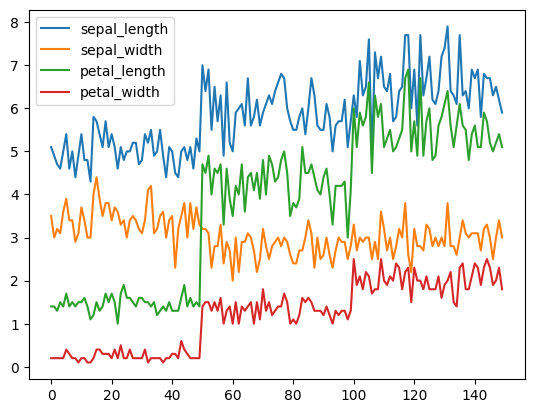

In [8]:
data.plot()

<AxesSubplot: >

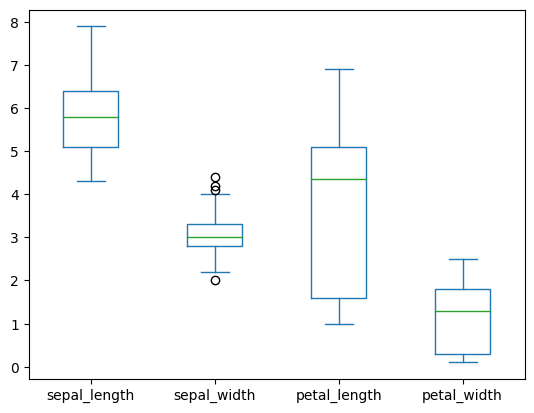

In [9]:
data.plot(kind="box")

array([[<AxesSubplot: title={'center': 'sepal_length'}>,
        <AxesSubplot: title={'center': 'sepal_width'}>],
       [<AxesSubplot: title={'center': 'petal_length'}>,
        <AxesSubplot: title={'center': 'petal_width'}>]], dtype=object)

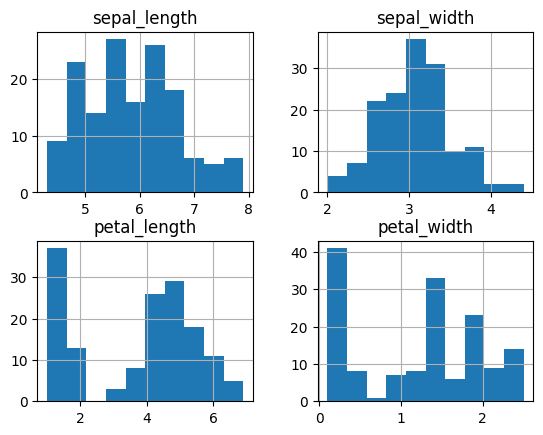

In [10]:
data.hist()

<AxesSubplot: xlabel='species', ylabel='count'>

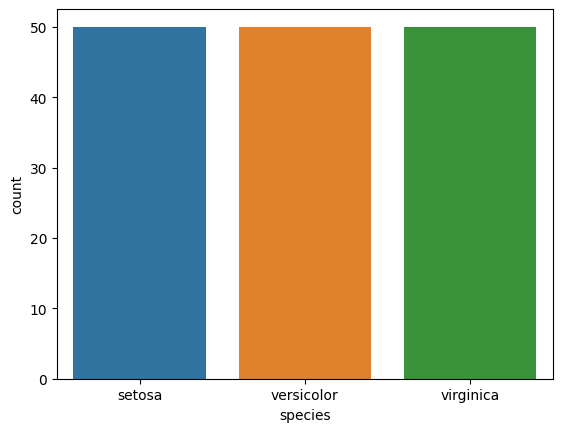

In [11]:
sns.countplot(x=data['species'])

<Figure size 600x600 with 0 Axes>

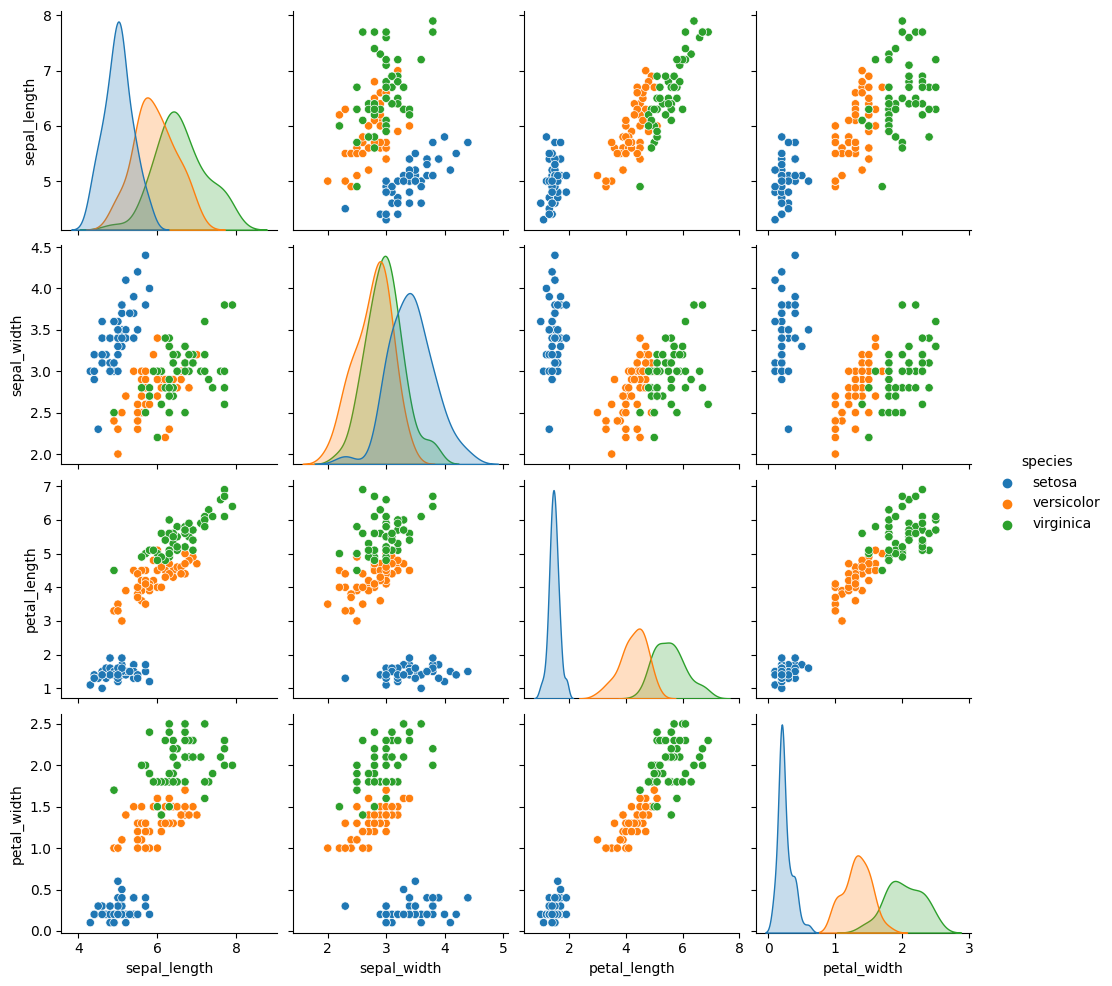

In [12]:
plt.figure(figsize=(6,6))
sns.pairplot(data,hue='species')
plt.show()

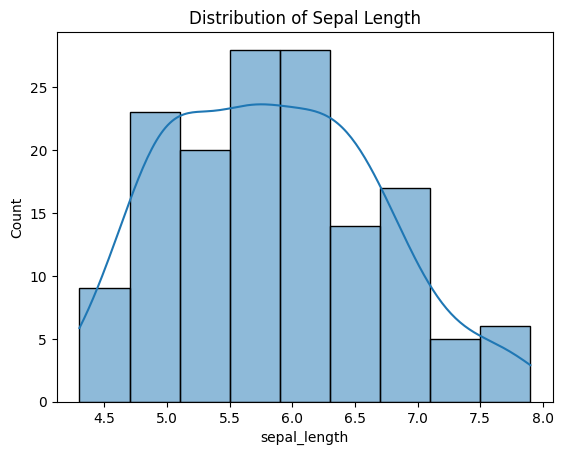

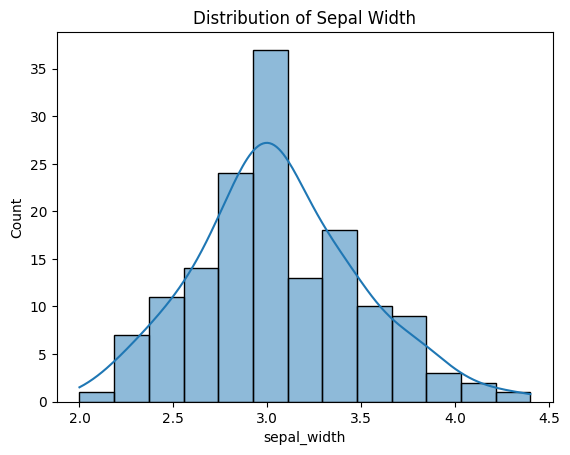

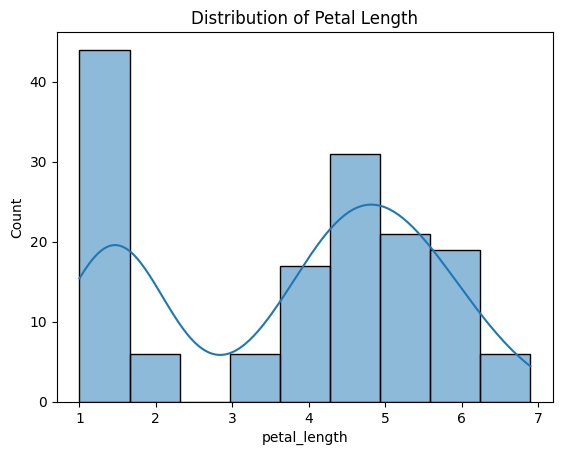

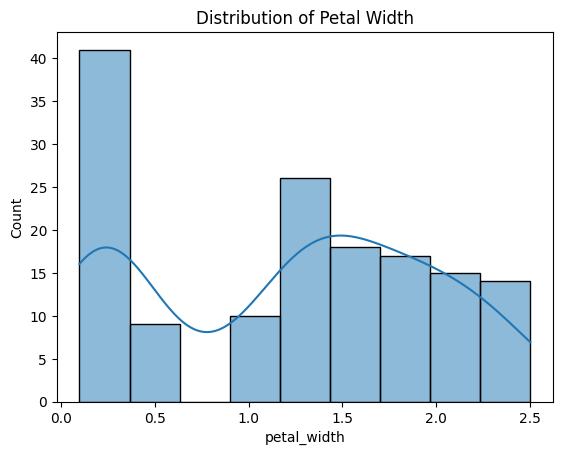

In [13]:
# Visualize the distribution of each feature using histograms
sns.histplot(data['sepal_length'], kde=True)
plt.title('Distribution of Sepal Length')
plt.show()

sns.histplot(data['sepal_width'], kde=True)
plt.title('Distribution of Sepal Width')
plt.show()

sns.histplot(data['petal_length'], kde=True)
plt.title('Distribution of Petal Length')
plt.show()

sns.histplot(data['petal_width'], kde=True)
plt.title('Distribution of Petal Width')
plt.show()

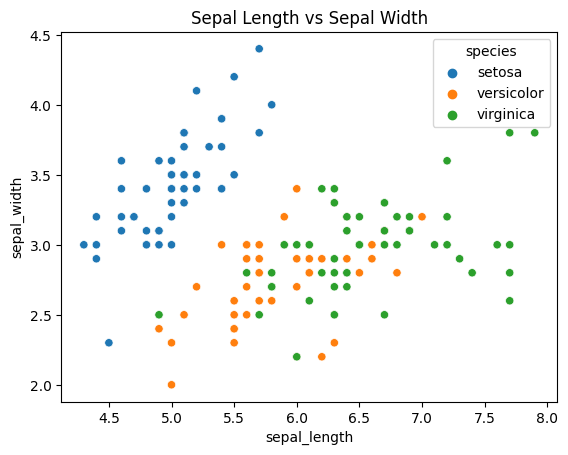

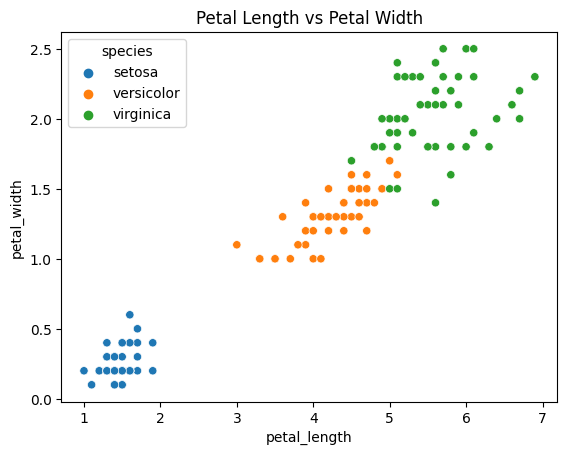

In [14]:
# Scatter plots of features against each other
sns.scatterplot(data=data, x='sepal_length', y='sepal_width', hue='species')
plt.title('Sepal Length vs Sepal Width')
plt.show()

sns.scatterplot(data=data, x='petal_length', y='petal_width', hue='species')
plt.title('Petal Length vs Petal Width')
plt.show()

C:\Users\stech\AppData\Local\Temp\ipykernel_14600\4194075674.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


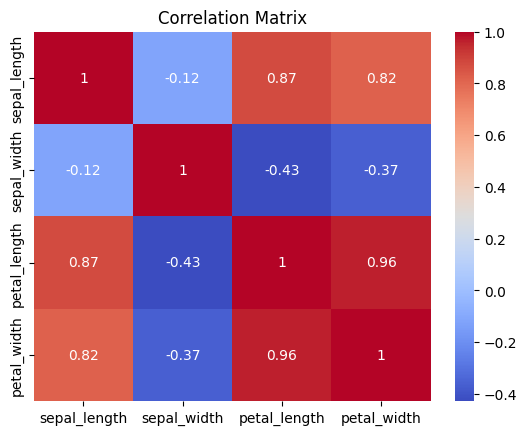

In [15]:
# Calculate and visualize the correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

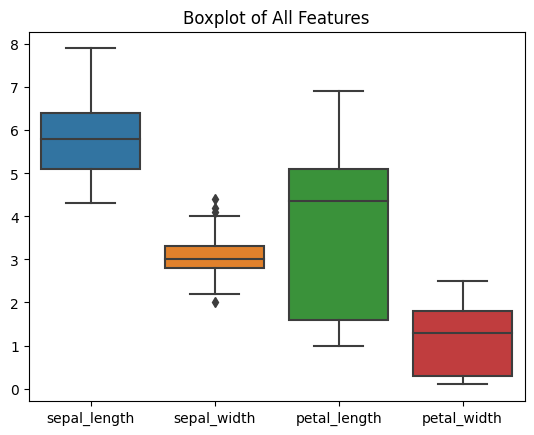

In [16]:
# Visualize outliers using boxplots
sns.boxplot(data=data)
plt.title('Boxplot of All Features')
plt.show()

# ML Classification

In [17]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Create the model
dtree = DecisionTreeClassifier()

# Train the model on the training data
dtree.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dtree.predict(X_test)

In [19]:
# Calculate the accuracy of the classifier
accuracy = (y_pred == y_test).mean()
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [20]:
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Visualizing Decision Tree

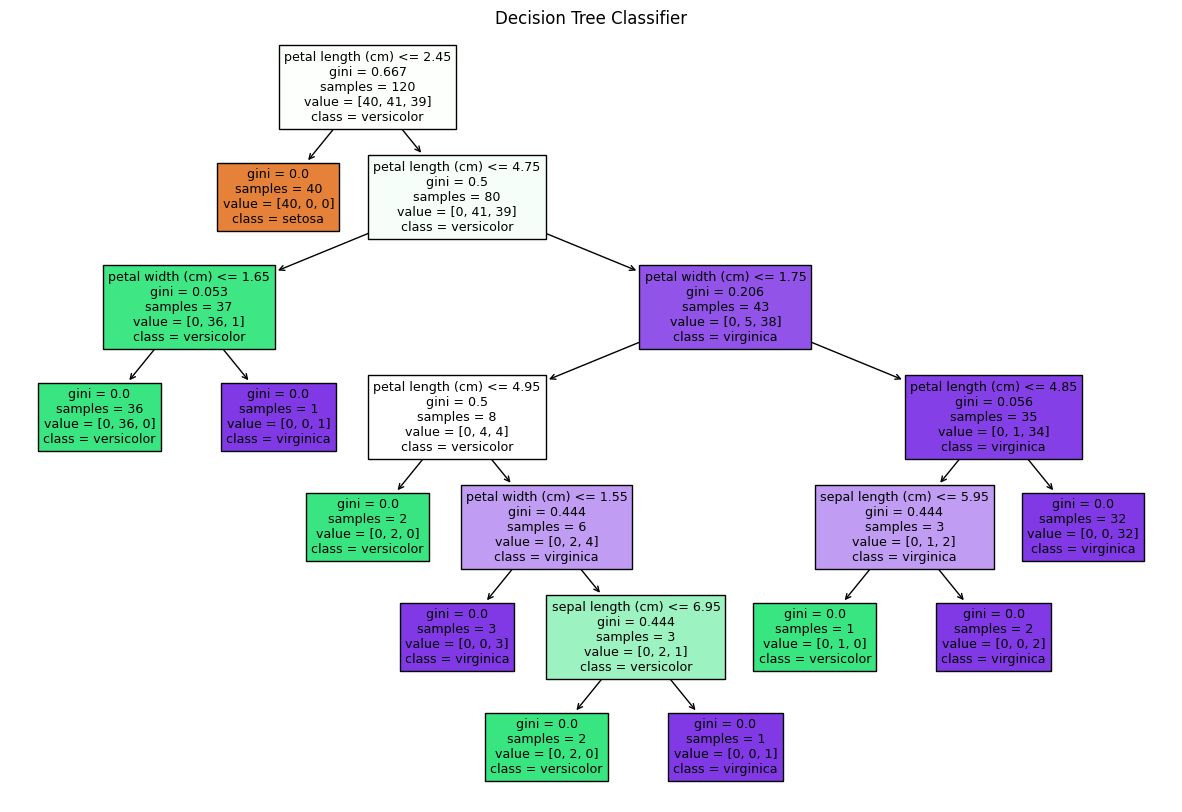

In [21]:
# Visualize the Decision Tree graphically
plt.figure(figsize=(15, 10))
tree.plot_tree(dtree, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.title("Decision Tree Classifier")
plt.show()

# Prediction Class Of Sample Data

In [22]:
# Sample new data for prediction (you can change the values accordingly)
sample_data = [[5.1, 3.5, 1.4, 0.2]]

# Use the trained classifier to predict the class for the sample data
predicted_class = dtree.predict(sample_data)

# Map the predicted class index to the target class label
predicted_class_label = data.target_names[predicted_class][0]

print(f"Predicted Class: {predicted_class_label}")

Predicted Class: setosa


c:\Users\stech\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
